<a href="https://colab.research.google.com/github/1002Sam/SMS-Spam-Detection/blob/main/SMS_Spam_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Intro

In today's digital age, Short Message Service (SMS) has become an essential means of communication, enabling quick and convenient exchange of information. However, with the widespread use of SMS, the prevalence of spam messages has also risen significantly. SMS spam, also known as unwanted or unsolicited text messages, often includes advertisements, phishing attempts, fraudulent schemes, and other malicious content.

The SMS Spam Detection Project aims to develop a robust and efficient system that can automatically identify and filter spam messages, protecting users from potential security risks and nuisances. By leveraging machine learning and natural language processing techniques, this project seeks to create a model that can accurately distinguish between legitimate and spam messages in real-time.

### Importing Libraries & Data

In [149]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
plt.style.use('ggplot')

In [150]:
#dataset filepath in my local system
smsdata = pd.read_csv('/content/spam.csv', encoding='latin-1')[['v1', 'v2']] #See text

Character Encoding: encoding='latin-1'

Character encoding is a method used to represent characters (letters, symbols, and other text elements) in a computer's memory or storage. Different character encodings are used to handle different languages and character sets. If the file contains characters that are outside the standard ASCII range, using the correct encoding is essential to ensure that the data is read and interpreted correctly.
By using encoding='latin-1', you are instructing Pandas to read the file using the Latin-1 encoding, which can handle a wider range of characters than the default UTF-8 encoding. This should resolve the UnicodeDecodeError and allow you to read the CSV file successfully.

[['v1', 'v2']] taking only specified columns from dataset.

### Small EDA

In [151]:
#renaming columns as label and message
smsdata.columns = ['label', 'message']
smsdata

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [152]:
smsdata.shape

(5572, 2)

In [153]:
smsdata['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [154]:
#sns.countplot(smsdata['label'])

In [155]:
smsdata.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

In [156]:
#Creating 'length' column from length of 'message' column
smsdata['length']=smsdata['message'].apply(len)
smsdata.head()

,label,message,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [157]:
smsdata.length.describe()

count    5572.000000
mean       80.118808
std        59.690841
min         2.000000
25%        36.000000
50%        61.000000
75%       121.000000
max       910.000000
Name: length, dtype: float64

<Axes: ylabel='Frequency'>

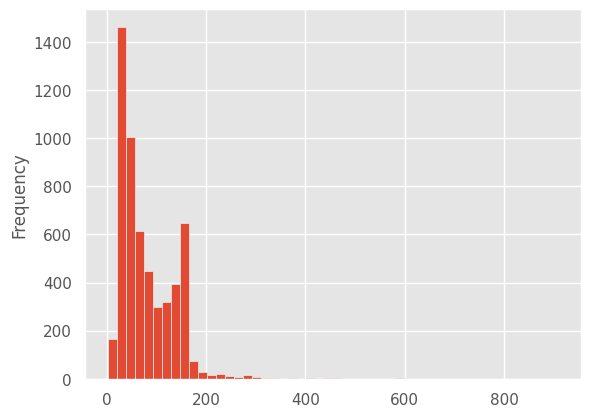

In [158]:
smsdata['length'].plot(bins=50,kind='hist')

The histogram can provide valuable insights into the distribution of message lengths, helping you understand the typical length of SMS messages in your dataset. It can also be useful for identifying potential outliers or unusual patterns in the message lengths.

Describe function also give some useful insights.

In [159]:
#Playing, code for the message (string) with a length of 120 characters
smsdata[smsdata['length']==120]['message'].iloc[0]

'SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV'

### Text Preprocessing

In [160]:
import re
import nltk

nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [161]:
# Creating ps instance for PorterStemmer class
ps = PorterStemmer()

In [162]:
#Stemming
corpus = []
for i in range(0, len(smsdata)):
    review = re.sub('[^a-zA-Z]', ' ', smsdata['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [191]:
#Preprocessed list of sentences
#corpus

In [164]:
# Creating the Bag of Words model with Vectorization
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=2500)
X = cv.fit_transform(corpus).toarray()

In [165]:
#Array of vector matrix of corpus limited to 2500 token features
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [166]:
#X.shape

### Spam/Class Prediction Model by BOG

In [167]:
y=pd.get_dummies(smsdata['label']) #OHE for label categorical column
y=y.iloc[:,1].values #This step to reduce variables if single column giving us info of two,
y                    #resulted 'y' will be a NumPy array containing binary values (0 and 1), where 1 represents 'spam' and 0 represents 'ham'.

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [168]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #here X is message's numerical vector matrix and y is label's array

In [169]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB  #GaussianNB also can be used but for continuous or floating based features
spam_detect_model = MultinomialNB().fit(X_train, y_train)
spam_detect_model

MultinomialNB()

In [170]:
X_pred=spam_detect_model.predict(X_train)
y_pred=spam_detect_model.predict(X_test)

In [171]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [172]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,X_pred)
test_accuracy = accuracy_score(y_test,y_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)

The accuracy on train dataset is 0.9885573255553063
The accuracy on test dataset is 0.9865470852017937


In [173]:
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m   #Refer below text

array([[943,   6],
       [  9, 157]])

REMARK - HERE we try to minimize FALSE POSITIVE by optimizing PRECISION because the mathematical model wrongly predicting important mail as SPAM.

In [174]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



### By using TF-IDF

In [175]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer   #lemmatizing algorithm used for word normalization

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [176]:
#creating instance named stemmer for class PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [177]:
#Lemmatization
corpus1 = []
for i in range(0, len(smsdata)):
    review = re.sub('[^a-zA-Z]', ' ', smsdata['message'][i])
    review = review.lower()
    review = review.split()

    review = [lemmatizer.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus1.append(review)

In [192]:
#processed list sentences by lemmatization
#corpus1

In [179]:
# Creating the TF-IDF model
from sklearn.feature_extraction.text import TfidfVectorizer
cv1 = TfidfVectorizer()
X = cv.fit_transform(corpus).toarray()

In [180]:
#X #see TF-IDF has given more importance to words but not others

In [181]:
#X.shape

### Spam-Ham Model by TF-IDF

In [182]:
y=pd.get_dummies(smsdata['label']) #OHE for label categorical column
y=y.iloc[:,1].values #This step to reduce variables if single column giving us info of two,
y                    #resulted 'y' will be a NumPy array containing binary values (0 and 1), where 1 represents 'spam' and 0 represents 'ham'.

array([0, 0, 1, ..., 0, 0, 0], dtype=uint8)

In [183]:
print("Shape of X1:", X.shape)
print("Shape of y1:", y.shape)

Shape of X1: (5572, 2500)
Shape of y1: (5572,)


In [184]:
# Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0) #here X is message's numerical vector matrix and y is label's array

In [185]:
# Training model using Naive bayes classifier

from sklearn.naive_bayes import MultinomialNB  #GaussianNB also can be used but for continuous or floating based features
spam_detect_model1 = MultinomialNB().fit(X_train, y_train)
spam_detect_model1

MultinomialNB()

In [186]:
X_pred=spam_detect_model.predict(X_train)
y_pred=spam_detect_model.predict(X_test)

In [187]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [188]:
# Calculating accuracy on train and test
train_accuracy = accuracy_score(y_train,X_pred)
test_accuracy = accuracy_score(y_test,y_pred)

print("The accuracy on train dataset is", train_accuracy)
print("The accuracy on test dataset is", test_accuracy)    #not much difference in accuracies

The accuracy on train dataset is 0.9885573255553063
The accuracy on test dataset is 0.9865470852017937


In [193]:
confusion_m = confusion_matrix(y_test, y_pred)
confusion_m   #Refer text in BOG confusion matrix

array([[943,   6],
       [  9, 157]])

In [190]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.96      0.95      0.95       166

    accuracy                           0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115

